In [ ]:
!pip install nvidia-modulus nvidia-modulus-sym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.9/291.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.6/582.6 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.1/772.1 kB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

# **Load libraries**

In [ ]:
# install three Python packages: For pre-processing text and ready-to-use datasets  in NLP
!pip install transformers sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim  #optimization algorithms for training neural networks
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_repo = 'google/mt5-base'
model_path = '/content/drive/My Drive/MT5_NLP.pt'
max_seq_len = 20

# **Load Tokenizer and Visualize Samples of the Tokens**

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Sentence: Here we are 
Tokens: ['▁Here', '▁we', '▁are']
Token Length: 3

Sentence: Doing our best
Tokens: ['▁Do', 'ing', '▁our', '▁best']
Token Length: 4

Sentence: And we hope to take the full mark in NLP
Tokens: ['▁And', '▁we', '▁hope', '▁to', '▁take', '▁the', '▁full', '▁mark', '▁in', '▁', 'NLP']
Token Length: 11

Token Length Frequency:
Length: 3 | Frequency: 1
Length: 4 | Frequency: 1
Length: 11 | Frequency: 1


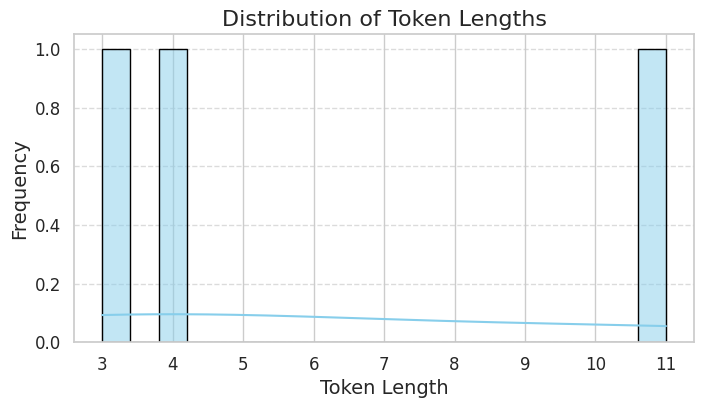

In [ ]:
# Select an appropriate tokenizer based on the model architecture
tokenizer = AutoTokenizer.from_pretrained(model_repo)

# Sample text data
corpus = ["Here we are ", "Doing our best", "And we hope to take the full mark in NLP"]

# Tokenize the corpus using the selected tokenizer
token_lengths = []
for sentence in corpus:
    tokens = tokenizer.tokenize(sentence)
    token_lengths.append(len(tokens))

    # Print the sentence, tokens, and token length
    print("Sentence:", sentence)
    print("Tokens:", tokens)
    print("Token Length:", len(tokens))
    print()

# Calculate frequency of each token length
token_length_freq = {}
for length in token_lengths:
    if length in token_length_freq:
        token_length_freq[length] += 1
    else:
        token_length_freq[length] = 1

# Print the frequency of each token length
print("Token Length Frequency:")
for length, freq in token_length_freq.items():
    print("Length:", length, "| Frequency:", freq)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of token lengths
plt.figure(figsize=(8, 4))
sns.histplot(token_lengths, bins=20, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Token Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Token Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#it indicates that there is only one occurrence of a token length of a specific value in the corpus.

# **Load The Model**

In [ ]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

#**There is 13 languages Codes :**

    "bg" - Bulgarian: усърден (usărden)
    "en" - English: hardworking
    "en_tok" - English (Tok Pisin): wok man
    "fil" - Filipino (Tagalog): masipag
    "hi" - Hindi: मेहनती (mehnati)
    "id" - Indonesian: rajin
    "ja" - Japanese: 勤勉な (kinben-na)
    "khm" - Khmer (Cambodian): សុខសប្បាយ (sok sabbay)
    "lo" - Lao: ມັນຕະຍົກ (man ta yak)
    "ms" - Malay: rajin
    "my" - Burmese: အလုပ်လုပ် (alup-lup)
    "th" - Thai: ขยัน (kayan)
    "vi" - Vietnamese: chăm chỉ
    "zh" - Chinese (Mandarin): 勤奋 (qín fèn)

# **Test Snipt**

In [ ]:
token_ids = tokenizer.encode('<jp> Talk to me in Japanese please !',
    return_tensors='pt').cuda()
#IDs generated by tokenizing the input text
print("token_ids: ", token_ids)

#IDs generated by the model based on the input
model_out = model.generate(token_ids)
print("model_out: ", model_out)

# converting the token IDs in model_out back into human-readable text using the tokenizer.
output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print("output_text: ", output_text)

token_ids:  tensor([[ 1042,  3889,   669, 36308,   288,   416,   281, 30865, 10151,   259,
           309,     1]], device='cuda:0')


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


model_out:  tensor([[     0, 250099,    259,    264,    259,    291,      1]],
       device='cuda:0')
output_text:  <pad> <extra_id_0> - ?</s>


# **Tokenization example**

In [ ]:
 #IDs generated by the tokenizer for the input string.
example_input_str = '<jp> I told you that i am japanese ! '

input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs:', input_ids)

#Convert Token IDs to Tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:', tokens)

Input IDs: tensor([[ 1042,  3889,   669,   336,   259, 16694,   521,   533,   259,   266,
           728, 95167,   259,   309,     1]])
Tokens: ['▁<', 'jp', '>', '▁I', '▁', 'told', '▁you', '▁that', '▁', 'i', '▁am', '▁japanese', '▁', '!', '</s>']


# **Sort the tokens**

In [ ]:
#sorts the vocabulary of the tokenizer based on the token IDs
sorted(tokenizer.vocab.items(), key=lambda x: x[1])

[('<pad>', 0),
 ('</s>', 1),
 ('<unk>', 2),
 ('<0x00>', 3),
 ('<0x01>', 4),
 ('<0x02>', 5),
 ('<0x03>', 6),
 ('<0x04>', 7),
 ('<0x05>', 8),
 ('<0x06>', 9),
 ('<0x07>', 10),
 ('<0x08>', 11),
 ('<0x09>', 12),
 ('<0x0A>', 13),
 ('<0x0B>', 14),
 ('<0x0C>', 15),
 ('<0x0D>', 16),
 ('<0x0E>', 17),
 ('<0x0F>', 18),
 ('<0x10>', 19),
 ('<0x11>', 20),
 ('<0x12>', 21),
 ('<0x13>', 22),
 ('<0x14>', 23),
 ('<0x15>', 24),
 ('<0x16>', 25),
 ('<0x17>', 26),
 ('<0x18>', 27),
 ('<0x19>', 28),
 ('<0x1A>', 29),
 ('<0x1B>', 30),
 ('<0x1C>', 31),
 ('<0x1D>', 32),
 ('<0x1E>', 33),
 ('<0x1F>', 34),
 ('<0x20>', 35),
 ('<0x21>', 36),
 ('<0x22>', 37),
 ('<0x23>', 38),
 ('<0x24>', 39),
 ('<0x25>', 40),
 ('<0x26>', 41),
 ('<0x27>', 42),
 ('<0x28>', 43),
 ('<0x29>', 44),
 ('<0x2A>', 45),
 ('<0x2B>', 46),
 ('<0x2C>', 47),
 ('<0x2D>', 48),
 ('<0x2E>', 49),
 ('<0x2F>', 50),
 ('<0x30>', 51),
 ('<0x31>', 52),
 ('<0x32>', 53),
 ('<0x33>', 54),
 ('<0x34>', 55),
 ('<0x35>', 56),
 ('<0x36>', 57),
 ('<0x37>', 58),
 ('<0x38>',

# **Load the Dataset**

In [ ]:
dataset = load_dataset("alt")

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [ ]:
#label train and test datasets
train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
#Accessing train_dataset
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'url': 'http://en.wikinews.org/wiki/2007_Rugby_World_Cup:_Italy_31_-_5_Portugal',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを

# **Mapping 7 languages**

In [ ]:
LANG_TOKEN_MAPPING = {
      'en' : '<en>',
      'fil': '<fil>',
      'hi' : '<hi>',
      'ja' : '<jp>',
      'ms' : '<ms>',
      'th' : '<th>',
      'zh' : '<zh>'
}

# **Make Special tokens Dictionary**

In [ ]:
#value is a list of special tokens obtained from the values of LANG_TOKEN_MAPPING
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)

#ensures that the model's embedding layer is compatible with the modified vocabulary
model.resize_token_embeddings(len(tokenizer))

Embedding(250107, 768)

# **Tokenizes the input string and padding**

token_ids:  tensor([[250103,    336,    259,  16694,    521,    533,    259,    266,    728,
          95167,    259,    309,      1,      0,      0,      0,      0,      0,
              0,      0]])
tokens:  ['<jp>', '▁I', '▁', 'told', '▁you', '▁that', '▁', 'i', '▁am', '▁japanese', '▁', '!', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


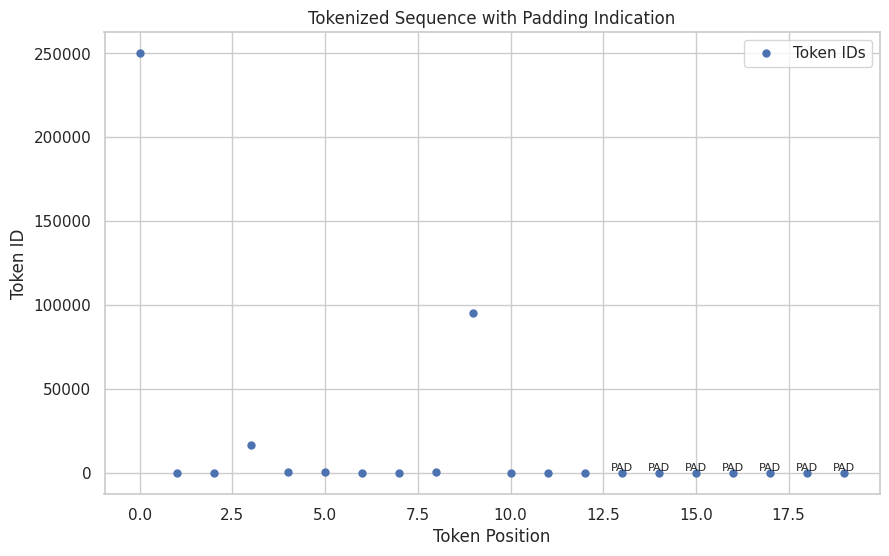

In [ ]:
# tokenizes the input string
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt', padding='max_length',
    truncation=True, max_length=max_seq_len)
print("token_ids: ", token_ids)

tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
print("tokens: ", tokens)
#Tokens without ▁ Prefix : a, .

# Plot token IDs with padding indication
plt.figure(figsize=(10, 6))
plt.plot(token_ids[0], marker='o', markersize=5, linestyle='', label='Token IDs')

# Add padding indication
for i, token_id in enumerate(token_ids[0]):
    if token_id == tokenizer.pad_token_id:
        plt.text(i, token_id, 'PAD', ha='center', va='bottom', fontsize=8)

plt.xlabel('Token Position')
plt.ylabel('Token ID')
plt.title('Tokenized Sequence with Padding Indication')
plt.legend()
plt.grid(True)
plt.show()

# **Tokenizes and encodes the input text with a target language**

In [ ]:
# Tokenizes and encodes the input text with a target language
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

# Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

#Returns the token IDs of the encoded input text.
  return input_ids[0]

#tokenizes and encodes the target text.
def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  #Returns the token IDs of the encoded target text
  return token_ids[0]

# prepares translation data for a batch.
def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

#transforms a batch of translation data
def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    # continue to the next translation set.
    if formatted_data is None:
      continue

    #append to arrays
    input_ids, target_ids = formatted_data

    #adding one or more singleton dimensions
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  #Concatenate the lists of input and target token IDs
  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle() #to randomize the order of samples.
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    # transform the raw batch into input and target token
    # the generator is iterated over, it produces one batch of transformed data.
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

# **Test the previous functions**

<fil> ▁ 意大利 在 法国 巴黎 王子 公园 体育 场 举办 的 2007 年 橄 榄 球 世界杯 C 组 以 3 1-5 击 败 葡萄 牙 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁Natal o ▁ng ▁Italy a ▁ang ▁Portugal ▁sa ▁punto s ▁na ▁3 1-5 ▁sa ▁ Grupo ng ▁C ▁no ong ▁2007 ▁sa ▁Panda ig di gang ▁la ro ▁ng ▁Rag bi ▁sa ▁Parc ▁des ▁Princes , ▁Paris , ▁France . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

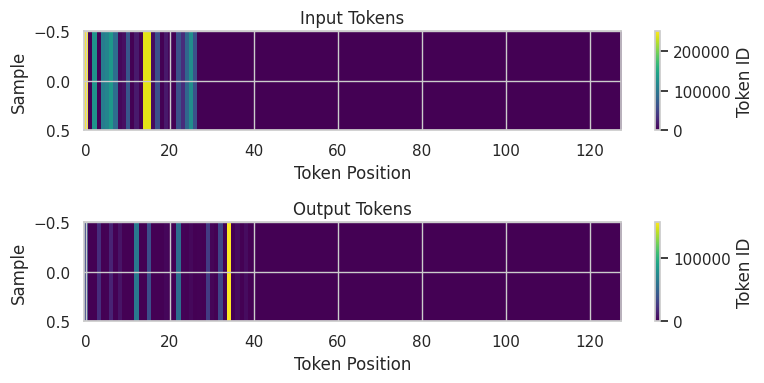

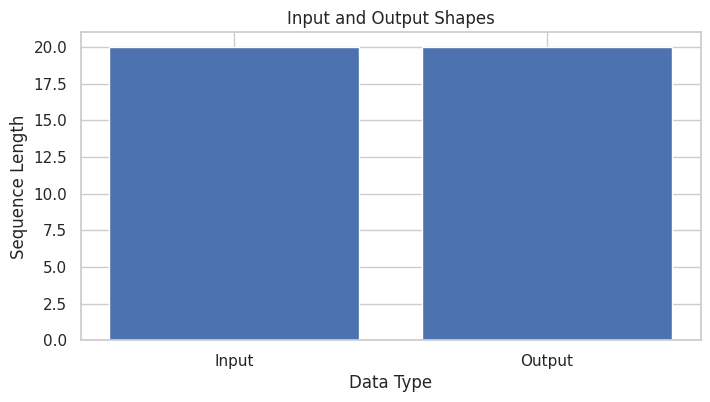

Input shape: torch.Size([8, 20])
Output shape: torch.Size([8, 20])


In [ ]:
# Testing `format_translation_data`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Plot input tokens
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.title("Input Tokens")
plt.imshow([in_ids], cmap='viridis', aspect='auto')
plt.colorbar(label='Token ID')
plt.xlabel('Token Position')
plt.ylabel('Sample')

# Plot output tokens
plt.subplot(2, 1, 2)
plt.title("Output Tokens")
plt.imshow([out_ids], cmap='viridis', aspect='auto')
plt.colorbar(label='Token ID')
plt.xlabel('Token Position')
plt.ylabel('Sample')

plt.tight_layout()
plt.show()

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)

# Plot input and output shapes
plt.figure(figsize=(8, 4))
plt.bar(['Input', 'Output'], [data_batch[0].shape[1], data_batch[1].shape[1]])
plt.title('Input and Output Shapes')
plt.xlabel('Data Type')
plt.ylabel('Sequence Length')
plt.show()
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

#**Save the model**

In [ ]:
torch.save(model.state_dict(), model_path)

# **Finetuning on MT5 pretrained model**

##loading the saved model

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
# define no.of epochs and another Constants
n_epochs = 8
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4 #equivalent to 5 * 10^(-4), which equals 0.0005
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)#prevent large updates to the model's parameters at the beginning of training

## Using AdamW Optimizer

In [ ]:
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)#inc lr from 0 during the warm-up phase and then linearly dec it towards 0 during the remaining training steps.

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#computing the average loss over a specified number of batches
losses = []

# **Model Evaluation**

In [ ]:
#evaluate a given model on a dataset
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  # iterate over batches of data
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    #Forward Propagation
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

# **Training Loop with Forward and Backward Propagation**

In [26]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward propagartion:passing input data through the neural network
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward() # back propagartion: computes the gradients of the loss with respect to the model's parameters using automatic differentiation
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

<ipython-input-26-cd5b82e5b20b>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 2.579 | lr: 0.00036989283322170125
Epoch: 1 | Step: 100 | Avg. loss: 2.472 | lr: 0.0003671020317035053
Epoch: 1 | Step: 150 | Avg. loss: 2.535 | lr: 0.0003643112301853092
Epoch: 1 | Step: 200 | Avg. loss: 2.486 | lr: 0.0003615204286671132
Epoch: 1 | Step: 250 | Avg. loss: 2.541 | lr: 0.0003587296271489172
Epoch: 1 | Step: 300 | Avg. loss: 2.499 | lr: 0.00035593882563072116
Epoch: 1 | Step: 350 | Avg. loss: 2.466 | lr: 0.0003531480241125251
Epoch: 1 | Step: 400 | Avg. loss: 2.478 | lr: 0.0003503572225943291
Epoch: 1 | Step: 450 | Avg. loss: 2.565 | lr: 0.00034756642107613305
Epoch: 1 | Step: 500 | Avg. loss: 2.495 | lr: 0.0003447756195579371
Epoch: 1 | Step: 550 | Avg. loss: 2.562 | lr: 0.000341984818039741
Epoch: 1 | Step: 600 | Avg. loss: 2.508 | lr: 0.00033919401652154495
Epoch: 1 | Step: 650 | Avg. loss: 2.469 | lr: 0.000336403215003349
Epoch: 1 | Step: 700 | Avg. loss: 2.492 | lr: 0.0003336124134851529
Epoch: 1 | Step: 750 | Avg. loss: 2.508 | lr: 0

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 2.374 | lr: 0.00030676490288010716
Epoch: 2 | Step: 100 | Avg. loss: 2.343 | lr: 0.00030397410136191115
Epoch: 2 | Step: 150 | Avg. loss: 2.390 | lr: 0.00030118329984371513
Epoch: 2 | Step: 200 | Avg. loss: 2.371 | lr: 0.00029839249832551906
Epoch: 2 | Step: 250 | Avg. loss: 2.403 | lr: 0.0002956016968073231
Epoch: 2 | Step: 300 | Avg. loss: 2.335 | lr: 0.000292810895289127
Epoch: 2 | Step: 350 | Avg. loss: 2.417 | lr: 0.000290020093770931
Epoch: 2 | Step: 400 | Avg. loss: 2.337 | lr: 0.000287229292252735
Epoch: 2 | Step: 450 | Avg. loss: 2.377 | lr: 0.00028443849073453897
Epoch: 2 | Step: 500 | Avg. loss: 2.359 | lr: 0.00028164768921634296
Epoch: 2 | Step: 550 | Avg. loss: 2.403 | lr: 0.00027885688769814694
Epoch: 2 | Step: 600 | Avg. loss: 2.295 | lr: 0.00027606608617995087
Epoch: 2 | Step: 650 | Avg. loss: 2.326 | lr: 0.0002732752846617549
Epoch: 2 | Step: 700 | Avg. loss: 2.283 | lr: 0.00027048448314355883
Epoch: 2 | Step: 750 | Avg. loss: 2.337 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 2.216 | lr: 0.00024363697253851308
Epoch: 3 | Step: 100 | Avg. loss: 2.261 | lr: 0.00024084617102031704
Epoch: 3 | Step: 150 | Avg. loss: 2.204 | lr: 0.000238055369502121
Epoch: 3 | Step: 200 | Avg. loss: 2.206 | lr: 0.00023526456798392498
Epoch: 3 | Step: 250 | Avg. loss: 2.229 | lr: 0.00023247376646572896
Epoch: 3 | Step: 300 | Avg. loss: 2.240 | lr: 0.00022968296494753294
Epoch: 3 | Step: 350 | Avg. loss: 2.234 | lr: 0.0002268921634293369
Epoch: 3 | Step: 400 | Avg. loss: 2.208 | lr: 0.00022410136191114088
Epoch: 3 | Step: 450 | Avg. loss: 2.256 | lr: 0.00022131056039294486
Epoch: 3 | Step: 500 | Avg. loss: 2.192 | lr: 0.00021851975887474885
Epoch: 3 | Step: 550 | Avg. loss: 2.277 | lr: 0.00021572895735655283
Epoch: 3 | Step: 600 | Avg. loss: 2.232 | lr: 0.00021293815583835676
Epoch: 3 | Step: 650 | Avg. loss: 2.267 | lr: 0.00021014735432016074
Epoch: 3 | Step: 700 | Avg. loss: 2.256 | lr: 0.00020735655280196472
Epoch: 3 | Step: 750 | Avg. loss: 2.22

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 2.156 | lr: 0.00018050904219691898
Epoch: 4 | Step: 100 | Avg. loss: 2.151 | lr: 0.00017771824067872293
Epoch: 4 | Step: 150 | Avg. loss: 2.152 | lr: 0.00017492743916052691
Epoch: 4 | Step: 200 | Avg. loss: 2.116 | lr: 0.00017213663764233087
Epoch: 4 | Step: 250 | Avg. loss: 2.121 | lr: 0.00016934583612413485
Epoch: 4 | Step: 300 | Avg. loss: 2.093 | lr: 0.0001665550346059388
Epoch: 4 | Step: 350 | Avg. loss: 2.144 | lr: 0.0001637642330877428
Epoch: 4 | Step: 400 | Avg. loss: 2.142 | lr: 0.00016097343156954677
Epoch: 4 | Step: 450 | Avg. loss: 2.153 | lr: 0.00015818263005135076
Epoch: 4 | Step: 500 | Avg. loss: 2.154 | lr: 0.00015539182853315474
Epoch: 4 | Step: 550 | Avg. loss: 2.164 | lr: 0.0001526010270149587
Epoch: 4 | Step: 600 | Avg. loss: 2.079 | lr: 0.00014981022549676268
Epoch: 4 | Step: 650 | Avg. loss: 2.213 | lr: 0.00014701942397856666
Epoch: 4 | Step: 700 | Avg. loss: 2.146 | lr: 0.00014422862246037064
Epoch: 4 | Step: 750 | Avg. loss: 2.17

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 2.015 | lr: 0.00011738111185532485
Epoch: 5 | Step: 100 | Avg. loss: 2.084 | lr: 0.00011459031033712882
Epoch: 5 | Step: 150 | Avg. loss: 2.058 | lr: 0.0001117995088189328
Epoch: 5 | Step: 200 | Avg. loss: 2.082 | lr: 0.00010900870730073676
Epoch: 5 | Step: 250 | Avg. loss: 2.072 | lr: 0.00010621790578254074
Epoch: 5 | Step: 300 | Avg. loss: 2.080 | lr: 0.00010342710426434471
Epoch: 5 | Step: 350 | Avg. loss: 2.092 | lr: 0.0001006363027461487
Epoch: 5 | Step: 400 | Avg. loss: 2.079 | lr: 9.784550122795268e-05
Epoch: 5 | Step: 450 | Avg. loss: 2.054 | lr: 9.505469970975665e-05
Epoch: 5 | Step: 500 | Avg. loss: 2.064 | lr: 9.226389819156062e-05
Epoch: 5 | Step: 550 | Avg. loss: 2.085 | lr: 8.947309667336459e-05
Epoch: 5 | Step: 600 | Avg. loss: 2.078 | lr: 8.668229515516857e-05
Epoch: 5 | Step: 650 | Avg. loss: 2.013 | lr: 8.389149363697254e-05
Epoch: 5 | Step: 700 | Avg. loss: 2.066 | lr: 8.110069211877652e-05
Epoch: 5 | Step: 750 | Avg. loss: 2.090 | lr

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 1.961 | lr: 5.4253181513730747e-05
Epoch: 6 | Step: 100 | Avg. loss: 2.025 | lr: 5.146237999553472e-05
Epoch: 6 | Step: 150 | Avg. loss: 1.963 | lr: 4.867157847733869e-05
Epoch: 6 | Step: 200 | Avg. loss: 1.953 | lr: 4.588077695914267e-05
Epoch: 6 | Step: 250 | Avg. loss: 1.995 | lr: 4.3089975440946644e-05
Epoch: 6 | Step: 300 | Avg. loss: 1.969 | lr: 4.029917392275061e-05
Epoch: 6 | Step: 350 | Avg. loss: 2.005 | lr: 3.750837240455459e-05
Epoch: 6 | Step: 400 | Avg. loss: 1.966 | lr: 3.471757088635856e-05
Epoch: 6 | Step: 450 | Avg. loss: 2.057 | lr: 3.1926769368162534e-05
Epoch: 6 | Step: 500 | Avg. loss: 2.023 | lr: 2.913596784996651e-05
Epoch: 6 | Step: 550 | Avg. loss: 1.987 | lr: 2.6345166331770486e-05
Epoch: 6 | Step: 600 | Avg. loss: 2.000 | lr: 2.355436481357446e-05
Epoch: 6 | Step: 650 | Avg. loss: 1.981 | lr: 2.076356329537843e-05
Epoch: 6 | Step: 700 | Avg. loss: 1.992 | lr: 1.7972761777182408e-05
Epoch: 6 | Step: 750 | Avg. loss: 1.961 | lr

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 2.050 | lr: 0.0
Epoch: 7 | Step: 100 | Avg. loss: 1.943 | lr: 0.0
Epoch: 7 | Step: 150 | Avg. loss: 1.910 | lr: 0.0
Epoch: 7 | Step: 200 | Avg. loss: 1.888 | lr: 0.0
Epoch: 7 | Step: 250 | Avg. loss: 1.981 | lr: 0.0
Epoch: 7 | Step: 300 | Avg. loss: 1.987 | lr: 0.0
Epoch: 7 | Step: 350 | Avg. loss: 1.966 | lr: 0.0
Epoch: 7 | Step: 400 | Avg. loss: 1.953 | lr: 0.0
Epoch: 7 | Step: 450 | Avg. loss: 1.977 | lr: 0.0
Epoch: 7 | Step: 500 | Avg. loss: 1.984 | lr: 0.0
Epoch: 7 | Step: 550 | Avg. loss: 1.972 | lr: 0.0
Epoch: 7 | Step: 600 | Avg. loss: 1.906 | lr: 0.0
Epoch: 7 | Step: 650 | Avg. loss: 2.008 | lr: 0.0
Epoch: 7 | Step: 700 | Avg. loss: 1.935 | lr: 0.0
Epoch: 7 | Step: 750 | Avg. loss: 1.978 | lr: 0.0
Epoch: 7 | Step: 800 | Avg. loss: 1.965 | lr: 0.0
Epoch: 7 | Step: 850 | Avg. loss: 1.975 | lr: 0.0
Epoch: 7 | Step: 900 | Avg. loss: 1.915 | lr: 0.0
Epoch: 7 | Step: 950 | Avg. loss: 1.945 | lr: 0.0
Epoch: 7 | Step: 1000 | Avg. loss: 1.904 | lr: 0.0


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 2.007 | lr: 0.0
Epoch: 8 | Step: 100 | Avg. loss: 1.992 | lr: 0.0
Epoch: 8 | Step: 150 | Avg. loss: 1.953 | lr: 0.0
Epoch: 8 | Step: 200 | Avg. loss: 1.931 | lr: 0.0
Epoch: 8 | Step: 250 | Avg. loss: 1.943 | lr: 0.0
Epoch: 8 | Step: 300 | Avg. loss: 1.959 | lr: 0.0
Epoch: 8 | Step: 350 | Avg. loss: 1.990 | lr: 0.0
Epoch: 8 | Step: 400 | Avg. loss: 1.948 | lr: 0.0
Epoch: 8 | Step: 450 | Avg. loss: 1.970 | lr: 0.0
Epoch: 8 | Step: 500 | Avg. loss: 1.956 | lr: 0.0
Epoch: 8 | Step: 550 | Avg. loss: 1.994 | lr: 0.0
Epoch: 8 | Step: 600 | Avg. loss: 1.985 | lr: 0.0
Epoch: 8 | Step: 650 | Avg. loss: 1.954 | lr: 0.0
Epoch: 8 | Step: 700 | Avg. loss: 1.953 | lr: 0.0
Epoch: 8 | Step: 750 | Avg. loss: 2.030 | lr: 0.0
Epoch: 8 | Step: 800 | Avg. loss: 1.966 | lr: 0.0
Epoch: 8 | Step: 850 | Avg. loss: 1.932 | lr: 0.0
Epoch: 8 | Step: 900 | Avg. loss: 1.965 | lr: 0.0
Epoch: 8 | Step: 950 | Avg. loss: 1.970 | lr: 0.0
Epoch: 8 | Step: 1000 | Avg. loss: 1.899 | lr: 0.0


# **Number of parameters**

In [27]:
# Count the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of parameters in the model:", num_params)

Number of parameters in the model: 582393600


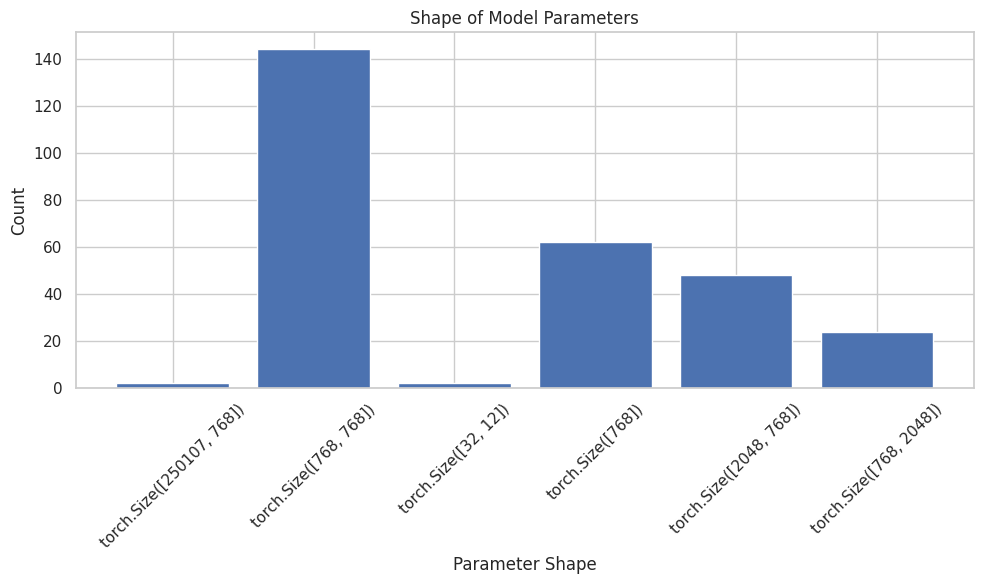

In [28]:
import matplotlib.pyplot as plt

# List to store the shapes of parameters
param_shapes = []

# Function to recursively get the shapes of parameters
def get_parameter_shapes(module):
    for name, param in module.named_parameters():
        param_shapes.append(param.shape)

# Call the function to collect parameter shapes
get_parameter_shapes(model)

# Count the occurrence of each unique shape
param_shape_counts = {}
for shape in param_shapes:
    param_shape_counts[shape] = param_shape_counts.get(shape, 0) + 1

# Plot the shape of parameters
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_shape_counts)), list(param_shape_counts.values()), align='center')
plt.xticks(range(len(param_shape_counts)), [str(shape) for shape in param_shape_counts.keys()], rotation=45)
plt.xlabel('Parameter Shape')
plt.ylabel('Count')
plt.title('Shape of Model Parameters')
plt.tight_layout()
plt.show()


# **Histogram of losses**

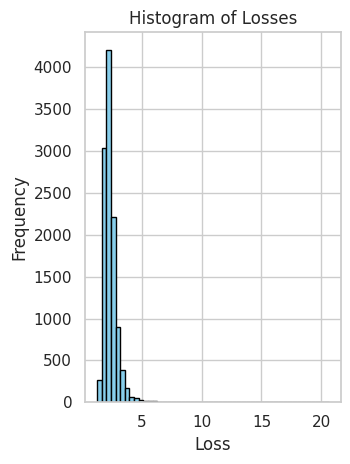

In [29]:
# Plot histogram of losses
plt.subplot(1, 2, 2)
plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')

# Show the plot
plt.tight_layout()
plt.show()

# **Loss Curve**

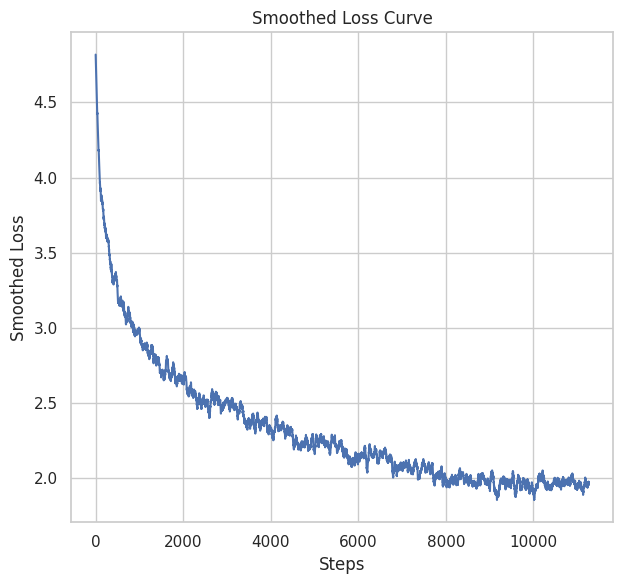

In [65]:
# Graph the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

window_size = 50
smoothed_losses = []
for i in range(len(losses) - window_size):
    smoothed_losses.append(np.mean(losses[i:i + window_size]))

plt.plot(smoothed_losses[100:])
plt.xlabel('Steps')
plt.ylabel('Smoothed Loss')
plt.title('Smoothed Loss Curve')

# Show the plot
plt.tight_layout()
plt.show()


# **Testing**

In [68]:
# Prompt the user to enter the target language for translation
target_lang = input("Enter the target language (e.g., 'en' for English): ")

# Fetch the test sentence from the dataset (assuming it's in Filipino)
test_sentence = test_dataset[0]['translation']['ms']
print('Raw input text:', test_sentence)

# Encode the input sentence for translation into the specified target language
input_ids = encode_input_str(
    text=test_sentence,
    target_lang=target_lang,
    tokenizer=tokenizer,
    seq_len=model.config.max_length,
    lang_token_map=LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))


Enter the target language (e.g., 'en' for English): en
Raw input text: Telah disahkan bahawa lapan kuda lumba thoroughbred di Tapak Lumba Randwick di Sydney telah dijangkiti influenza kuda.
Truncated input text: <en> Telah disahkan bahawa lapan kuda lumba thoroughbred di Tapak L</s>


In [69]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

It has been confirmed that eight wheelchair drivers in Loughborough, Ontario have
It has been confirmed that eight wheelchair drivers in Loughborough, Ontario were
It has been confirmed that eight trawlers in Loughborough, Ontario were


In [77]:
#@title Slick Blue Translate
input_text = '現在、私は7つの言語を話す!' #@param {type:"string"}
output_language = 'en' #@param ["en", "ja", "zh", "bg","fil", "hi", "ms", "th"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

現在、私は7つの言語を話す!  ->  Currently, I speak seven languages!
